#### 1. import the dataset, describe, get general information and variance of the entire dataset, assign the column Well_ Name as a categorical variable and plot the seven (7) wells.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/christianaranguren/Documents/UCalgary - PhD Pe. Eng/1. TA Reservoir Characterization & Geological/Final Project/Data_Final_Project.csv")
df.head(3)

,Well_Name,Depth,GR,RESD,RESS,RHOB,NEUTRON,Vshale,PHIE,Sw,PERM
0,Well-01,2190.0,123.4375,5.8163,5.2970,1.8366,0.4979,0.8898,0.0001,1.0,0.0
1,Well-01,2190.5,95.1875,5.9865,5.2071,1.8649,0.5584,0.4875,0.0001,1.0,0.0
2,Well-01,2191.0,75.4375,5.7865,5.4365,1.9648,0.4347,0.3585,0.0001,1.0,0.0


In [2]:
df.shape

(5769, 11)

In [3]:
df.describe().round(2)

,Depth,GR,RESD,RESS,RHOB,NEUTRON,Vshale,PHIE,Sw,PERM
count,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00
mean,2498.17,73.44,89.45,129.99,2.46,0.28,0.44,0.07,0.80,70.62
std,166.35,36.93,270.58,530.58,0.19,0.12,0.28,0.06,0.30,191.38
min,2098.00,9.42,0.54,1.18,1.38,0.02,0.00,0.00,0.04,0.00
25%,2375.00,40.77,7.74,9.60,2.36,0.19,0.17,0.02,0.62,0.00
50%,2511.50,73.36,20.69,22.86,2.47,0.26,0.43,0.05,1.00,0.00
75%,2618.50,102.12,52.88,55.55,2.58,0.35,0.70,0.12,1.00,6.03
max,2872.50,217.09,2479.92,9296.00,3.06,0.72,1.03,0.28,1.00,1589.23


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5769 entries, 0 to 5768
Data columns (total 11 columns):
Well_Name    5769 non-null object
Depth        5769 non-null float64
GR           5769 non-null float64
RESD         5769 non-null float64
RESS         5769 non-null float64
RHOB         5769 non-null float64
NEUTRON      5769 non-null float64
Vshale       5769 non-null float64
PHIE         5769 non-null float64
Sw           5769 non-null float64
PERM         5769 non-null float64
dtypes: float64(10), object(1)
memory usage: 495.9+ KB


In [5]:
df.var()

Depth       27672.696547
GR           1364.017278
RESD        73215.698399
RESS       281516.679533
RHOB            0.036764
NEUTRON         0.014210
Vshale          0.080666
PHIE            0.003882
Sw              0.090995
PERM        36624.494266
dtype: float64

In [6]:
df['Well_Name'] = df['Well_Name'].astype('category')
df['Well_Name'].unique()

[Well-01, Well-02, Well-03, Well-04, Well-05, Well-06, Well-07]
Categories (7, object): [Well-01, Well-02, Well-03, Well-04, Well-05, Well-06, Well-07]

In [7]:
%matplotlib inline
def Make_well_logs_plot (logs):
    # Sort logs by depth
    logs = logs.sort_values(by='Depth')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(20, 6))
    ax[0].plot(logs.GR, logs.Depth, '-', color='darkgreen')
    ax[1].plot(logs.RESD, logs.Depth, '-', color='black')
    ax[1].plot(logs.RESS, logs.Depth, '-', color='magenta') 
    ax22 = ax[2].twiny()
    ax22.plot(logs.RHOB, logs.Depth, '-', color='red')
    ax23 = ax[2].twiny()
    ax23.plot(logs.NEUTRON, logs.Depth, '-', color='darkgreen')
    ax[3].plot(logs.Vshale, logs.Depth, '-', color='fuchsia')
    ax[4].plot(logs.PHIE, logs.Depth, '-', color='red')
    ax[5].plot(logs.Sw, logs.Depth, '-', color='black')
    ax[6].plot(logs.PERM, logs.Depth, '-', color='darkslategrey')
    
    for i in range(len(ax)):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=5)

    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("RESD / RESS")
    ax[1].set_xlim(logs.RESD.min(),logs.RESD.max())
    ax22.spines['top'].set_position(('outward',10))
    ax22.set_xlabel("RHOB")
    ax22.set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax23.invert_xaxis()
    ax23.spines['top'].set_position(('outward',50))
    ax23.set_xlabel("NEUTRON")
    ax23.set_xlim(logs.NEUTRON.max(),logs.NEUTRON.min())
    ax[3].set_xlabel("Vshale")
    ax[3].set_xlim(logs.Vshale.min(),logs.Vshale.max())
    ax[4].set_xlabel("PHIE")
    ax[4].set_xlim(logs.PHIE.min(),logs.PHIE.max())
    ax[5].set_xlabel("Sw")
    ax[5].set_xlim(logs.Sw.min(),logs.Sw.max())
    ax[6].set_xlabel('PERM')
    ax[6].set_xlim(logs.PERM.min(),logs.PERM.max())
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
    fig.suptitle('Well: %s'%logs.iloc[0]['Well_Name'], fontsize=14,y=0.94)


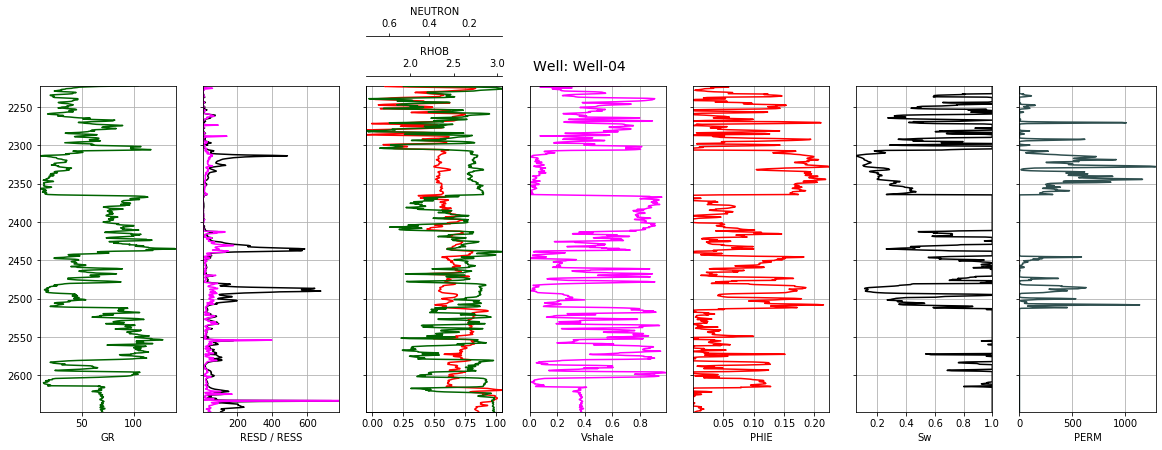

In [8]:
Make_well_logs_plot(df[df['Well_Name'] == 'Well-04'])

#### 2. Create a dataframe for each target variable as you will require to predict them independently (Vshale, PHIE, Sw and PERM). For this reason, you have to create four (4) different data frames having five (5) predictor variables in order to predict one (1) target variable.

In [9]:
df_Vshale = df.drop(['PHIE', 'Sw', 'PERM'], axis=1)
df_Vshale.head(2)

,Well_Name,Depth,GR,RESD,RESS,RHOB,NEUTRON,Vshale
0,Well-01,2190.0,123.4375,5.8163,5.2970,1.8366,0.4979,0.8898
1,Well-01,2190.5,95.1875,5.9865,5.2071,1.8649,0.5584,0.4875


In [10]:
df_PHIE = df.drop(['Vshale', 'Sw', 'PERM'], axis=1)
df_PHIE.head(2)

,Well_Name,Depth,GR,RESD,RESS,RHOB,NEUTRON,PHIE
0,Well-01,2190.0,123.4375,5.8163,5.2970,1.8366,0.4979,0.0001
1,Well-01,2190.5,95.1875,5.9865,5.2071,1.8649,0.5584,0.0001


In [11]:
df_Sw = df.drop(['Vshale', 'PHIE', 'PERM'], axis=1)
df_Sw.head(2)

,Well_Name,Depth,GR,RESD,RESS,RHOB,NEUTRON,Sw
0,Well-01,2190.0,123.4375,5.8163,5.2970,1.8366,0.4979,1.0
1,Well-01,2190.5,95.1875,5.9865,5.2071,1.8649,0.5584,1.0


In [12]:
df_PERM = df.drop(['Vshale', 'PHIE', 'Sw'], axis=1)
df_PERM.head(2)

,Well_Name,Depth,GR,RESD,RESS,RHOB,NEUTRON,PERM
0,Well-01,2190.0,123.4375,5.8163,5.2970,1.8366,0.4979,0.0
1,Well-01,2190.5,95.1875,5.9865,5.2071,1.8649,0.5584,0.0


#### 3. Split your data frames (4)  and Standardize them using “StandardScale” to have GR, RESD, RESS, RHOB, NEUTRON  as features (predictor variables) and your target variable. For the first data frame, the target variable is Vshale, then, repeat the same process for PHIE, Sw and PERM consequently. 

In [13]:
## VSHALE

Feature_Vshale = df_Vshale.drop(["Well_Name", "Vshale", "Depth"], axis=1)
Label_Vshale = df_Vshale[["Vshale"]]

In [14]:
from sklearn.preprocessing import StandardScaler # Standardizing Data

scaler_Vshale = StandardScaler()
Vshale_scaled = pd.DataFrame(scaler_Vshale.fit_transform(Feature_Vshale), columns=Feature_Vshale.columns)
print (Vshale_scaled.var())

GR         1.000173
RESD       1.000173
RESS       1.000173
RHOB       1.000173
NEUTRON    1.000173
dtype: float64


In [15]:
Vshale_df = pd.concat([Vshale_scaled, Label_Vshale], axis=1, sort=False)
print (Vshale_df.head())

         GR      RESD      RESS      RHOB   NEUTRON  Vshale
0  1.353807 -0.309127 -0.235025 -3.239433  1.854738  0.8898
1  0.588834 -0.308498 -0.235194 -3.091824  2.362300  0.4875
2  0.054030 -0.309237 -0.234762 -2.570760  1.324526  0.3585
3 -0.433387 -0.310743 -0.233986 -1.717446  0.009061  0.2464
4 -0.714328 -0.310875 -0.229836 -0.261700 -1.080728  0.0880


In [16]:
## EFFECTIVE POROSITY

Feature_PHIE = df_PHIE.drop(["Well_Name", "PHIE", "Depth"], axis=1)
Label_PHIE = df_PHIE[["PHIE"]]

In [17]:
scaler_PHIE = StandardScaler()
PHIE_scaled = pd.DataFrame(scaler_PHIE.fit_transform(Feature_PHIE), columns=Feature_PHIE.columns)
print (PHIE_scaled.var())

GR         1.000173
RESD       1.000173
RESS       1.000173
RHOB       1.000173
NEUTRON    1.000173
dtype: float64


In [18]:
PHIE_df = pd.concat([PHIE_scaled, Label_PHIE], axis=1, sort=False)
print (PHIE_df.head())

         GR      RESD      RESS      RHOB   NEUTRON    PHIE
0  1.353807 -0.309127 -0.235025 -3.239433  1.854738  0.0001
1  0.588834 -0.308498 -0.235194 -3.091824  2.362300  0.0001
2  0.054030 -0.309237 -0.234762 -2.570760  1.324526  0.0001
3 -0.433387 -0.310743 -0.233986 -1.717446  0.009061  0.0001
4 -0.714328 -0.310875 -0.229836 -0.261700 -1.080728  0.0001


In [19]:
## WATER SATURATION

Feature_Sw = df_Sw.drop(["Well_Name", "Sw", "Depth"], axis=1)
Label_Sw = df_Sw[["Sw"]]

In [20]:
scaler_Sw = StandardScaler()
Sw_scaled = pd.DataFrame(scaler_Sw.fit_transform(Feature_Sw), columns=Feature_Sw.columns)
print (Sw_scaled.var())

GR         1.000173
RESD       1.000173
RESS       1.000173
RHOB       1.000173
NEUTRON    1.000173
dtype: float64


In [21]:
Sw_df = pd.concat([Sw_scaled, Label_Sw], axis=1, sort=False)
print (Sw_df.head())

         GR      RESD      RESS      RHOB   NEUTRON   Sw
0  1.353807 -0.309127 -0.235025 -3.239433  1.854738  1.0
1  0.588834 -0.308498 -0.235194 -3.091824  2.362300  1.0
2  0.054030 -0.309237 -0.234762 -2.570760  1.324526  1.0
3 -0.433387 -0.310743 -0.233986 -1.717446  0.009061  1.0
4 -0.714328 -0.310875 -0.229836 -0.261700 -1.080728  1.0


In [22]:
## PERMEABILITY

Feature_PERM = df_PERM.drop(["Well_Name", "PERM", "Depth"], axis=1)
Label_PERM = df_PERM[["PERM"]]

In [23]:
scaler_PERM = StandardScaler()
PERM_scaled = pd.DataFrame(scaler_PERM.fit_transform(Feature_PERM), columns=Feature_PERM.columns)
print (PERM_scaled.var())

GR         1.000173
RESD       1.000173
RESS       1.000173
RHOB       1.000173
NEUTRON    1.000173
dtype: float64


In [24]:
PERM_df = pd.concat([PERM_scaled, Label_PERM], axis=1, sort=False)
print (PERM_df.head())

         GR      RESD      RESS      RHOB   NEUTRON  PERM
0  1.353807 -0.309127 -0.235025 -3.239433  1.854738   0.0
1  0.588834 -0.308498 -0.235194 -3.091824  2.362300   0.0
2  0.054030 -0.309237 -0.234762 -2.570760  1.324526   0.0
3 -0.433387 -0.310743 -0.233986 -1.717446  0.009061   0.0
4 -0.714328 -0.310875 -0.229836 -0.261700 -1.080728   0.0


#### 4. Create a correlation for each data frame to see the covariance between the features and target using heatmaps with the library Seaborn.

(0, 6)

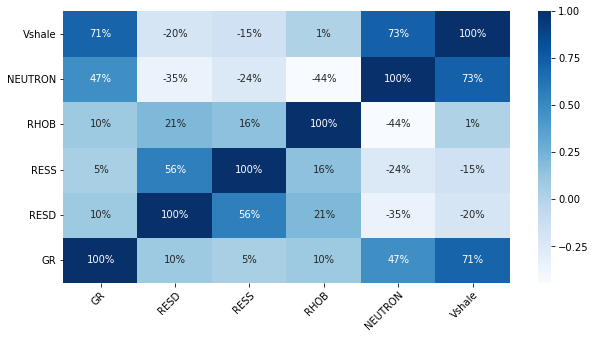

In [25]:
# Visualize correlation Vshale

%matplotlib inline
plt.figure(figsize=(10,5))

ax = sns.heatmap(Vshale_df.corr(), annot=True, fmt ='.0%', cmap="Blues")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")
ax.set_ylim(len(df)-5769,6)

(0, 6)

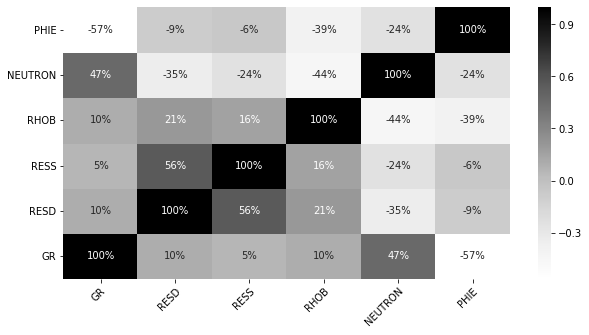

In [26]:
# Visualize correlation PHIE
%matplotlib inline
plt.figure(figsize=(10,5))

ax = sns.heatmap(PHIE_df.corr(), annot=True, fmt ='.0%', cmap="Greys")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")
ax.set_ylim(len(df)-5769,6)

(0, 6)

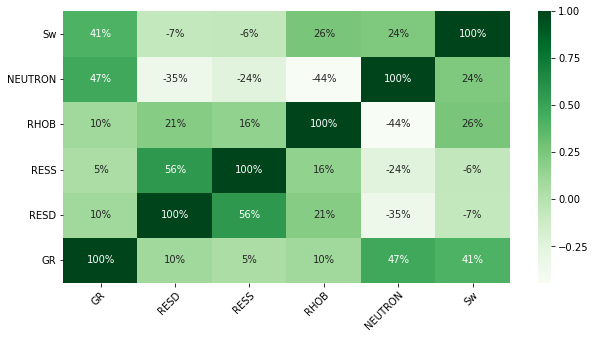

In [27]:
# Visualize correlation Sw
%matplotlib inline
plt.figure(figsize=(10,5))

ax = sns.heatmap(Sw_df.corr(), annot=True, fmt ='.0%', cmap="Greens")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")
ax.set_ylim(len(df)-5769,6)

(0, 6)

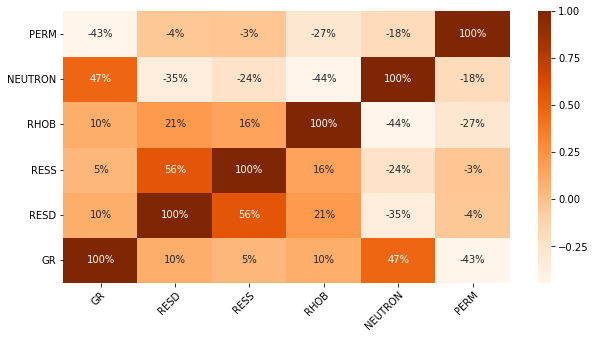

In [28]:
# Visualize correlation PERM
%matplotlib inline
plt.figure(figsize=(10,5))

ax = sns.heatmap(PERM_df.corr(), annot=True, fmt ='.0%', cmap="Oranges")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")
ax.set_ylim(len(df)-5769,6)

#### 5. Create a Dataframe called “blind”, which drops the Well-06 from your dataset. It will be later used to predict its petrophysical evaluation and compare with the real interpretation.

In [29]:
# Blind data
blind = df[df['Well_Name'] == 'Well-06']
dataset = df[df['Well_Name'] != 'Well-06']

In [30]:
blind.head(3)

,Well_Name,Depth,GR,RESD,RESS,RHOB,NEUTRON,Vshale,PHIE,Sw,PERM
3893,Well-06,2499.0,97.1458,76.549,82.543,2.595,0.139,0.6410,0.0001,1.0,0.0000
3894,Well-06,2499.5,101.0588,29.413,31.583,2.487,0.221,0.6762,0.0147,1.0,0.0003
3895,Well-06,2500.0,98.1028,12.632,13.285,2.326,0.318,0.6496,0.0186,1.0,0.0007


#### 6. Generally, when using Sklearn to create a machine learning model, requires that your data frame converts to a numpy array. First, convert your feature and target data frames into numpy using to_numpy().

# Random Forest Regressor Model

## Vshale

In [31]:
Vshale_scaled_np = Vshale_scaled.to_numpy()
Label_Vshale_np = Label_Vshale.to_numpy()

In [32]:
type(Label_Vshale_np)

numpy.ndarray

In [33]:
print (Label_Vshale_np)

[[0.8898]
 [0.4875]
 [0.3585]
 ...
 [0.8633]
 [0.9036]
 [0.8941]]


#### 7. Split data (training 80% and testing 20%), create, evaluate your model and convert your predictions from Numpy to a data frame. If you come out with a model different to Random Forest Regressor will give you more points. 

In [34]:
from sklearn.ensemble import RandomForestRegressor # RANDOM FOREST REGRESSOR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

X_train, X_test, y_train, y_test = train_test_split (Vshale_scaled_np, Label_Vshale_np, test_size=0.2, random_state=1111)

rf_Vshale = RandomForestRegressor(bootstrap = True, max_depth = 17, min_samples_leaf = 3, n_estimators = 1000)
rf_Vshale.fit(X_train, y_train)

/Users/christianaranguren/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [35]:
Vshale_pred = rf_Vshale.predict(X_test)

In [36]:
X_test.shape

(1154, 5)

In [37]:
print (MSE(y_test, Vshale_pred)**(1/2))

0.09692028036261417


In [38]:
type(Vshale_pred)

numpy.ndarray

In [39]:
type(y_test)

numpy.ndarray

In [40]:
Vshale_predict = pd.DataFrame(data=Vshale_pred, columns=["Vshale_pred"])
print(Vshale_predict)

      Vshale_pred
0        0.705297
1        0.103745
2        0.791358
3        0.791802
4        0.790208
...           ...
1149     0.471619
1150     0.019128
1151     0.897107
1152     0.706586
1153     0.029127

[1154 rows x 1 columns]


In [41]:
Vshale_real = pd.DataFrame(data=y_test, columns=["Vshale_real"])
print(Vshale_real)

      Vshale_real
0          0.7809
1          0.1148
2          0.7639
3          0.7550
4          0.6909
...           ...
1149       0.3650
1150       0.0471
1151       0.9600
1152       0.6756
1153       0.0238

[1154 rows x 1 columns]


#### 8. For the Blind Test, call Well-06 and create the predictor variable sets, Standardize them, and apply the model you recently created to predict Vshale, PHIE, Sw and PERM. Convert your results from Numpy to a data frame and compare the real petrophysical interpretation, with the one your predicted with your model.

# BLIND TEST

## Vshale

In [42]:
y_blind_Vshale = blind['Vshale'].values
y_blind_Vshale.shape

(503,)

In [43]:
X_blind_Vshale = blind.drop(["Well_Name", "Vshale", "Depth", "PHIE", "Sw", "PERM"], axis=1)
X_blind_Vshale.shape

(503, 5)

In [44]:
X_blind_scaler_Vshale = StandardScaler()
Vshale_X_blind_np = X_blind_scaler_Vshale.fit_transform(X_blind_Vshale)
type(Vshale_X_blind_np)

numpy.ndarray

In [45]:
yhat_blind_Vshale = rf_Vshale.predict(Vshale_X_blind_np)
yhat_blind_Vshale.shape

(503,)

In [46]:
Vshale_real = pd.DataFrame(data=y_blind_Vshale, columns=["Vshale_real"])
print(Vshale_real)

     Vshale_real
0         0.6410
1         0.6762
2         0.6496
3         0.6128
4         0.5652
..           ...
498       0.3380
499       0.3519
500       0.3664
501       0.3616
502       0.3594

[503 rows x 1 columns]


In [47]:
Vshale_pred = pd.DataFrame(data=yhat_blind_Vshale, columns=["Vshale_pred"])
print(Vshale_pred)

     Vshale_pred
0       0.228992
1       0.567509
2       0.558929
3       0.535044
4       0.540878
..           ...
498     0.265511
499     0.262618
500     0.252054
501     0.250777
502     0.260158

[503 rows x 1 columns]


In [48]:
Depth_Vshale = blind['Depth'].values 
Depth_Vshale.shape

(503,)

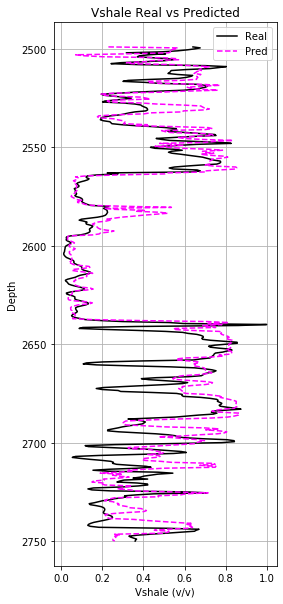

In [49]:
plt.figure (figsize=(4,10))
plt.plot(Vshale_real, Depth_Vshale, c='black')
plt.plot(Vshale_pred, Depth_Vshale, c='magenta', linestyle='--')
plt.grid()
plt.gca().invert_yaxis()
plt.title('Vshale Real vs Predicted')
plt.xlabel('Vshale (v/v)')
plt.ylabel('Depth')
plt.legend(['Real', 'Pred'], loc=0)

# Random Forest Regressor Model

## Effective Porosity

In [50]:
PHIE_scaled_np = PHIE_scaled.to_numpy()
Label_PHIE_np = Label_PHIE.to_numpy()

In [51]:
type(PHIE_scaled_np)

numpy.ndarray

In [52]:
print (Label_PHIE_np)

[[0.0001]
 [0.0001]
 [0.0001]
 ...
 [0.022 ]
 [0.0201]
 [0.021 ]]


In [53]:
X_train, X_test, y_train, y_test = train_test_split (PHIE_scaled_np, Label_PHIE_np, test_size=0.2, random_state=1111)

rf_PHIE = RandomForestRegressor(bootstrap = True, max_depth = 19, min_samples_leaf = 3, n_estimators = 200)
rf_PHIE.fit(X_train, y_train)

/Users/christianaranguren/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [54]:
PHIE_pred = rf_PHIE.predict(X_test)

In [55]:
print (MSE(y_test, PHIE_pred)**(1/2))

0.03019927296172857


# BLIND TEST

# Effective Porosity

In [56]:
y_blind_PHIE = blind['PHIE'].values
y_blind_PHIE.shape

(503,)

In [57]:
X_blind_PHIE = blind.drop(["Well_Name", "Vshale", "Depth", "PHIE", "Sw", "PERM"], axis=1)
X_blind_PHIE.shape

(503, 5)

In [58]:
X_blind_scaler_PHIE = StandardScaler()
PHIE_X_blind_np = X_blind_scaler_PHIE.fit_transform(X_blind_PHIE)
type(PHIE_X_blind_np)

numpy.ndarray

In [59]:
yhat_blind_PHIE = rf_PHIE.predict(PHIE_X_blind_np)
yhat_blind_PHIE.shape

(503,)

In [60]:
PHIE_real = pd.DataFrame(data=y_blind_PHIE, columns=["PHIE_real"])
print(PHIE_real)

     PHIE_real
0       0.0001
1       0.0147
2       0.0186
3       0.0233
4       0.0277
..         ...
498     0.0670
499     0.0749
500     0.0759
501     0.0761
502     0.0749

[503 rows x 1 columns]


In [61]:
PHIE_pred = pd.DataFrame(data=yhat_blind_PHIE, columns=["PHIE_pred"])
print(PHIE_pred)

     PHIE_pred
0     0.019135
1     0.064097
2     0.096574
3     0.098584
4     0.093607
..         ...
498   0.046180
499   0.047581
500   0.049898
501   0.050188
502   0.050137

[503 rows x 1 columns]


In [62]:
Depth_PHIE = blind['Depth'].values 
Depth_PHIE.shape

(503,)

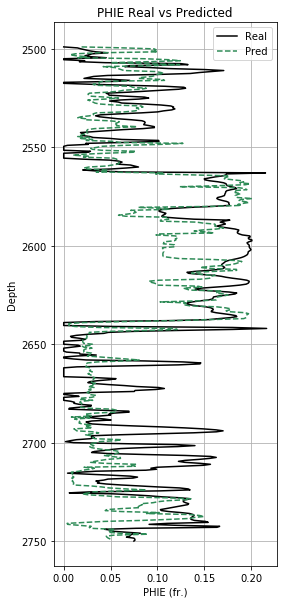

In [63]:
plt.figure (figsize=(4,10))
plt.plot(PHIE_real, Depth_PHIE, c='black')
plt.plot(PHIE_pred, Depth_PHIE, c='seagreen', linestyle='--')
plt.grid()
plt.gca().invert_yaxis()
plt.title('PHIE Real vs Predicted')
plt.xlabel('PHIE (fr.)')
plt.ylabel('Depth')
plt.legend(['Real', 'Pred'], loc=0)

# Random Forest Regressor Model

## Water Saturation

In [64]:
Sw_scaled_np = Sw_scaled.to_numpy()
Label_Sw_np = Label_Sw.to_numpy()

In [65]:
type(Sw_scaled_np)

numpy.ndarray

In [66]:
print (Label_Sw_np)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [67]:
X_train, X_test, y_train, y_test = train_test_split (Sw_scaled_np, Label_Sw_np, test_size=0.2, random_state=1111)

rf_Sw = RandomForestRegressor(bootstrap = True, max_depth = 15, min_samples_leaf = 3, n_estimators = 1000)
rf_Sw.fit(X_train, y_train)

/Users/christianaranguren/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [68]:
Sw_pred = rf_Sw.predict(X_test)

In [69]:
print (MSE(y_test, Sw_pred)**(1/2))

0.1556090238782603


# BLIND TEST

## Water Saturation

In [70]:
y_blind_Sw = blind['Sw'].values
y_blind_Sw.shape

(503,)

In [71]:
X_blind_Sw = blind.drop(["Well_Name", "Vshale", "Depth", "PHIE", "Sw", "PERM"], axis=1)
X_blind_Sw.shape

(503, 5)

In [72]:
X_blind_scaler_Sw = StandardScaler()
Sw_X_blind_np = X_blind_scaler_Sw.fit_transform(X_blind_Sw)
type(Sw_X_blind_np)

numpy.ndarray

In [73]:
yhat_blind_Sw = rf_Sw.predict(Sw_X_blind_np)
yhat_blind_Sw.shape

(503,)

In [74]:
Sw_real = pd.DataFrame(data=y_blind_Sw, columns=["Sw_real"])
print(Sw_real)

     Sw_real
0     1.0000
1     1.0000
2     1.0000
3     1.0000
4     1.0000
..       ...
498   0.7414
499   0.6296
500   0.5724
501   0.5394
502   0.5376

[503 rows x 1 columns]


In [75]:
Sw_pred = pd.DataFrame(data=yhat_blind_Sw, columns=["Sw_pred"])
print(Sw_pred)

      Sw_pred
0    0.990061
1    0.982985
2    0.984092
3    0.991847
4    0.990658
..        ...
498  0.786446
499  0.785956
500  0.780079
501  0.782347
502  0.738494

[503 rows x 1 columns]


In [76]:
Depth_Sw = blind['Depth'].values 
Depth_Sw.shape

(503,)

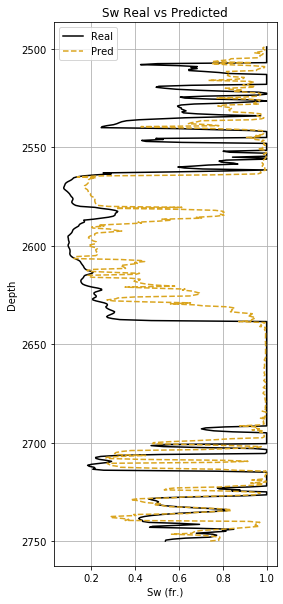

In [77]:
plt.figure (figsize=(4,10))
plt.plot(Sw_real, Depth_PHIE, c='black')
plt.plot(Sw_pred, Depth_PHIE, c='goldenrod', linestyle='--')
plt.grid()
plt.gca().invert_yaxis()
plt.title('Sw Real vs Predicted')
plt.xlabel('Sw (fr.)')
plt.ylabel('Depth')
plt.legend(['Real', 'Pred'], loc=0)

# Random Forest Regressor Model

## Permeability

In [78]:
PERM_scaled_np = PERM_scaled.to_numpy()
Label_PERM_np = Label_PERM.to_numpy()

In [79]:
type(PERM_scaled_np)

numpy.ndarray

In [80]:
print (Label_PERM_np)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [81]:
X_train, X_test, y_train, y_test = train_test_split (PERM_scaled_np, Label_PERM_np, test_size=0.2, random_state=1111)

rf_PERM = RandomForestRegressor(bootstrap = True, max_depth = 15, min_samples_leaf = 3, n_estimators = 100)
rf_PERM.fit(X_train, y_train)

/Users/christianaranguren/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [82]:
PERM_pred = rf_PERM.predict(X_test)

In [83]:
print (MSE(y_test, PERM_pred)**(1/2))

93.6473026130504


# BLIND TEST

## Permeability

In [84]:
y_blind_PERM = blind['PERM'].values
y_blind_PERM.shape

(503,)

In [85]:
X_blind_PERM = blind.drop(["Well_Name", "Vshale", "Depth", "PHIE", "Sw", "PERM"], axis=1)
X_blind_PERM.shape

(503, 5)

In [86]:
X_blind_scaler_PERM = StandardScaler()
PERM_X_blind_np = X_blind_scaler_PERM.fit_transform(X_blind_PERM)
type(PERM_X_blind_np)

numpy.ndarray

In [87]:
yhat_blind_PERM = rf_PERM.predict(PERM_X_blind_np)
yhat_blind_PERM.shape

(503,)

In [88]:
PERM_real = pd.DataFrame(data=y_blind_PERM, columns=["PERM_real"])
print(PERM_real)

     PERM_real
0       0.0000
1       0.0003
2       0.0007
3       0.0017
4       0.0035
..         ...
498     1.4776
499     2.9163
500     3.1785
501     3.2255
502     2.9296

[503 rows x 1 columns]


In [89]:
PERM_pred = pd.DataFrame(data=yhat_blind_PERM, columns=["PERM_pred"])
print(PERM_pred)

      PERM_pred
0      0.000122
1     40.493044
2    107.273821
3    108.341803
4    108.341852
..          ...
498    0.267801
499    0.608319
500    0.648729
501    0.687649
502    1.164732

[503 rows x 1 columns]


In [90]:
Depth_PERM = blind['Depth'].values 
Depth_PERM.shape

(503,)

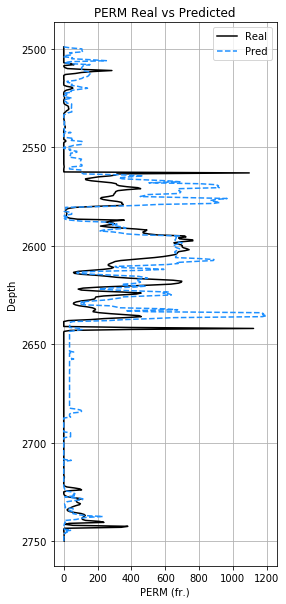

In [91]:
plt.figure (figsize=(4,10))
plt.plot(PERM_real, Depth_PERM, c='black')
plt.plot(PERM_pred, Depth_PERM, c='dodgerblue', linestyle='--')
plt.grid()
plt.gca().invert_yaxis()
plt.title('PERM Real vs Predicted')
plt.xlabel('PERM (fr.)')
plt.ylabel('Depth')
plt.legend(['Real', 'Pred'], loc=0)

#### 9. Finally, create a visualization that shows a comparison between the real and predicted petrophysical analysis as shown in slide 12.

In [92]:
Depth = blind['Depth']

Text(0.5, 0.94, 'Well: Well-06 Predicted vs Real')

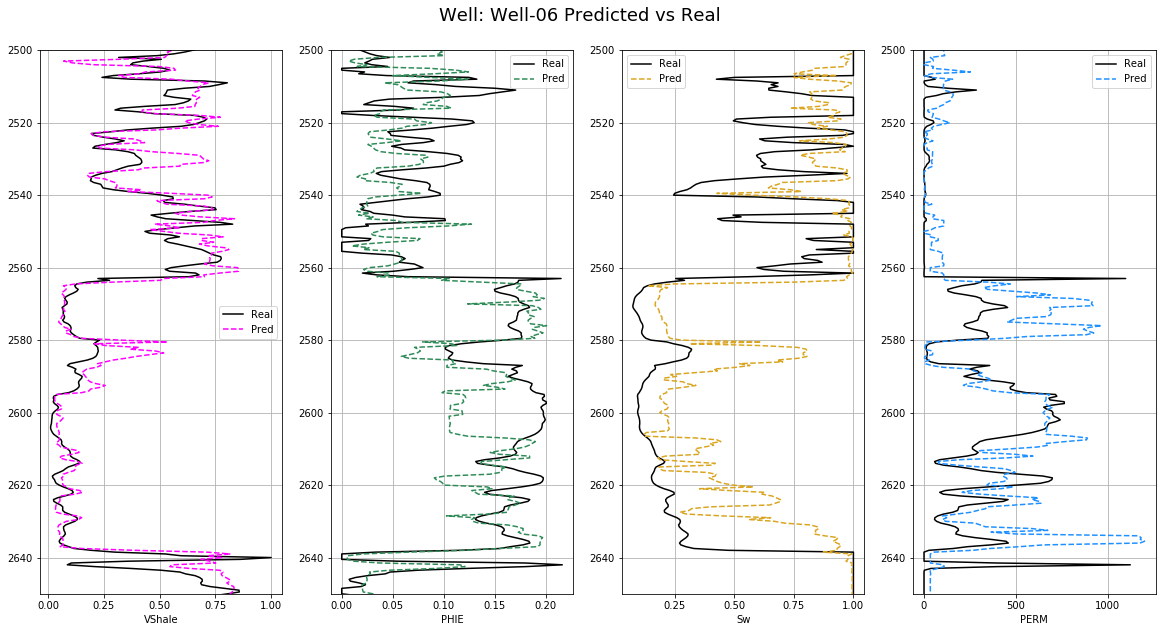

In [93]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 10))

ax[0].plot(Vshale_real, Depth, '-', c='black')
ax[0].plot(Vshale_pred, Depth, '--', c='magenta', linestyle='--')
ax[1].plot(PHIE_real, Depth, '-', c='black')
ax[1].plot(PHIE_pred, Depth, '--', c='seagreen', linestyle='--')
ax[2].plot(Sw_real, Depth, '-', c='black')
ax[2].plot(Sw_pred, Depth, '--', c='goldenrod', linestyle='--')
ax[3].plot(PERM_real, Depth, '-', c='black')
ax[3].plot(PERM_pred, Depth, '--', c='dodgerblue', linestyle='--')

for b in range(len(ax)):
    ax[b].invert_yaxis()
    ax[b].grid()
    ax[b].locator_params(axis='x', nbins=5)
    ax[b].legend(['Real', 'Pred'], loc=0)


ax[0].set_xlabel("VShale")
ax[0].set_ylim(2650, 2500)
ax[1].set_xlabel("PHIE")
ax[1].set_ylim(2650, 2500)
ax[2].set_xlabel("Sw")
ax[2].set_ylim(2650, 2500)
ax[3].set_xlabel("PERM")
ax[3].set_ylim(2650, 2500)

fig.suptitle('Well: Well-06 Predicted vs Real', fontsize=18,y=0.94)